# Importing all the necessary Libraries

In [29]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Connection to Twitter using Keys

In [2]:
df=pd.read_csv('keys.csv')

In [3]:
consumer_key=df['Keys'][0]
consumer_secret=df['Keys'][1]
access_token=df['Keys'][2]
access_token_secret=df['Keys'][3]

In [4]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

# Searching for 200 Tweets with hashtag driverlesscars

In [78]:
posts=api.search_tweets(q='#driverlesscars',count=200,tweet_mode='extended')

In [79]:
posts

[Status(_api=<tweepy.api.API object at 0x0000014E1C42AFA0>, _json={'created_at': 'Tue Oct 12 23:29:15 +0000 2021', 'id': 1448068276584603650, 'id_str': '1448068276584603650', 'full_text': 'RT @guidaautonoma: Highway Stars: How #Autonomous Trucking Became The Unlikely Hero Of Autonomous\n\nhttps://t.co/8WBzd0SSvJ\n#SelfDrivingCars…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [{'text': 'Autonomous', 'indices': [38, 49]}, {'text': 'SelfDrivingCars', 'indices': [123, 139]}], 'symbols': [], 'user_mentions': [{'screen_name': 'guidaautonoma', 'name': 'guidaautonoma', 'id': 728441661429141505, 'id_str': '728441661429141505', 'indices': [3, 17]}], 'urls': [{'url': 'https://t.co/8WBzd0SSvJ', 'expanded_url': 'https://www.autonews.com/sponsored/highway-stars-how-autonomous-trucking-became-unlikely-hero-autonomous-vehicle-development', 'display_url': 'autonews.com/sponsored/high…', 'indices': [99, 122]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 're

# Display top 10 recent Tweets

In [80]:
print('show the 10 recent tweets')
i=1
for tweet in posts[0:10]:
    print(str(i)+')',tweet.full_text+ '\n' )
    i+=1

show the 10 recent tweets
1) RT @guidaautonoma: Highway Stars: How #Autonomous Trucking Became The Unlikely Hero Of Autonomous

https://t.co/8WBzd0SSvJ
#SelfDrivingCars…

2) See @Stanford 's latest Autonomous Driving tech - Via @SpirosMargaris 

#selfdriving #driverless #robocars #cars #automotive #technology
#driverlesscars #autonomouscars #autonomousvehicles https://t.co/nHVHrg75Wb

3) RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Zambini845 @atomicthumbs No single type of sensor can be 100.0% safe.😔

AI sensor fusion req'd…

4) RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Zambini845 @atomicthumbs No single type of sensor can be 100.0% safe.😔

AI sensor fusion req'd…

5) RT @selfdriving360: Electric and autonomous cars, buses and delivery vehicles at CES - via @QuickTake 

#driverlesscars #autonomouscars #au…

6) RT @selfdriving360: Electric and autonomous cars, buses and delivery vehicles at CES - via @QuickTake 

#driverlesscars #autonomouscars #au…

7) Electric and autonomous cars,

In [81]:
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,RT @guidaautonoma: Highway Stars: How #Autonom...
1,See @Stanford 's latest Autonomous Driving tec...
2,RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Z...
3,RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Z...
4,RT @selfdriving360: Electric and autonomous ca...
...,...
95,"#Tesla, sino a 10 mila auto a settimana dalla ..."
96,To bicyclists everywhere - we see you ️ @V...
97,RT @selfdriving360: @SebastianThrun talking ab...
98,@SebastianThrun talking about his experience u...


In [82]:
df.head()

,Tweets
0,RT @guidaautonoma: Highway Stars: How #Autonom...
1,See @Stanford 's latest Autonomous Driving tec...
2,RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Z...
3,RT @GrandpaRobot: @gr8tfurme @LucLewitanski @Z...
4,RT @selfdriving360: Electric and autonomous ca...


# Cleaning The tweets

In [83]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9_A-Za-z0-9:]+','',text) #Removes @ mentions
    text=re.sub(r'#','',text) #removing the '#' symbol
    text=re.sub(r'RT[\s]+','',text) #removing RT
    text=re.sub(r'https:\/\/.*','', text) #Remove the hper link
    text=re.sub(r'\n','', text)
    
    return text

In [84]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [85]:
df

,Tweets
0,Highway Stars: How Autonomous Trucking Became ...
1,See 's latest Autonomous Driving tech - Via ...
2,No single type of sensor can be 100.0% safe.😔A...
3,No single type of sensor can be 100.0% safe.😔A...
4,"Electric and autonomous cars, buses and delive..."
...,...
95,"Tesla, sino a 10 mila auto a settimana dalla G..."
96,To bicyclists everywhere - we see you ️ c...
97,talking about his experience using Tesla Autop...
98,talking about his experience using Tesla Auto...


# Get Subjectivity and Polarity for our Tweets

In [86]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [87]:
df

,Tweets,Subjectivity,Polarity
0,Highway Stars: How Autonomous Trucking Became ...,0.600000,-0.050000
1,See 's latest Autonomous Driving tech - Via ...,0.800000,0.450000
2,No single type of sensor can be 100.0% safe.😔A...,0.214286,0.035714
3,No single type of sensor can be 100.0% safe.😔A...,0.214286,0.035714
4,"Electric and autonomous cars, buses and delive...",0.700000,0.400000
...,...,...,...
95,"Tesla, sino a 10 mila auto a settimana dalla G...",0.700000,0.400000
96,To bicyclists everywhere - we see you ️ c...,0.000000,0.000000
97,talking about his experience using Tesla Autop...,0.000000,0.000000
98,talking about his experience using Tesla Auto...,0.000000,0.000000


# Plotting The Word Cloud

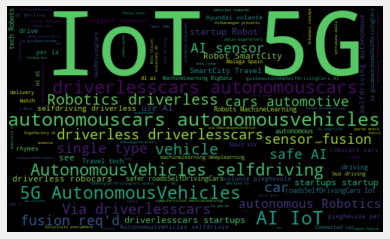

In [88]:
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300, random_state=42,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Creating a Sentiment Analysis Attribute based on Polarity. 

In [89]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [90]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Highway Stars: How Autonomous Trucking Became ...,0.600000,-0.050000,Negative
1,See 's latest Autonomous Driving tech - Via ...,0.800000,0.450000,positive
2,No single type of sensor can be 100.0% safe.😔A...,0.214286,0.035714,positive
3,No single type of sensor can be 100.0% safe.😔A...,0.214286,0.035714,positive
4,"Electric and autonomous cars, buses and delive...",0.700000,0.400000,positive
...,...,...,...,...
95,"Tesla, sino a 10 mila auto a settimana dalla G...",0.700000,0.400000,positive
96,To bicyclists everywhere - we see you ️ c...,0.000000,0.000000,Neutral
97,talking about his experience using Tesla Autop...,0.000000,0.000000,Neutral
98,talking about his experience using Tesla Auto...,0.000000,0.000000,Neutral


# Printing all the positive tweets

In [91]:
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='positive':
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) See  's latest Autonomous Driving tech - Via  selfdriving driverless robocars cars automotive technologydriverlesscars autonomouscars autonomousvehicles 

2) No single type of sensor can be 100.0% safe.😔AI sensor fusion req'd…

3) No single type of sensor can be 100.0% safe.😔AI sensor fusion req'd…

4) Electric and autonomous cars, buses and delivery vehicles at CES - via  driverlesscars autonomouscars au…

5) Electric and autonomous cars, buses and delivery vehicles at CES - via  driverlesscars autonomouscars au…

6) Electric and autonomous cars, buses and delivery vehicles at CES - via  driverlesscars autonomouscars autonomousvehicles selfdriving driverless robocars cars automotive technology 

7) Glad to see our paper on use &amp; usefulness of time in driverlesscars AutonomousVehicles SelfDrivingCars  among the most ci…

8) No single type of sensor can be 100.0% safe.😔AI sensor fusion req'd…

9) Guess who’s the biggest investor in selfdriving tech? It rhymes with BambungSelfDriv

# Printing all the negative tweets

In [92]:

j=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Negative':
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) Highway Stars: How Autonomous Trucking Became The Unlikely Hero Of AutonomousSelfDrivingCars…

2) Volkswagen working with disabled people to understand mobility needsSelfDrivingCars AI I…

3) Highway Stars: How Autonomous Trucking Became The Unlikely Hero Of AutonomousSelfDrivingCars…

4) Highway Stars: How Autonomous Trucking Became The Unlikely Hero Of AutonomousSelfDrivingCars AI IoT 5G AutonomousVehicles selfdriving Robotics driverless driverlesscars startups startup Robot SmartCity tech MachineLearning delivery 



# Plot the Subjectivity and Polarity

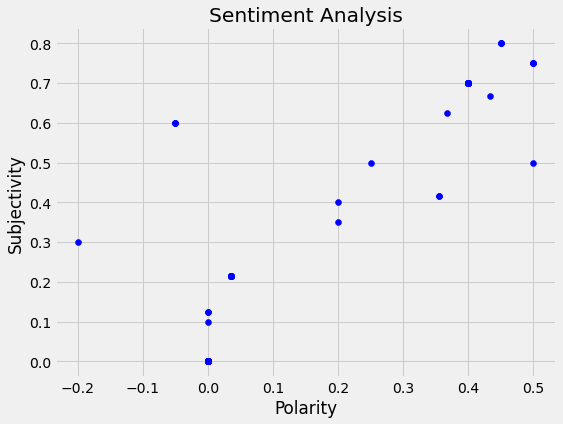

In [93]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Print the percentage of all the Tweets

In [94]:
#print the percentage of positive Tweets
positive_tweets=df[df['Analysis']=='positive']
positive_tweets=positive_tweets['Tweets']

round(positive_tweets.shape[0]/df.shape[0]*100,1)

39.0

In [95]:
#print the percentage of Negative Tweets
neg_tweets=df[df['Analysis']=='Negative']
neg_tweets=neg_tweets['Tweets']

round(neg_tweets.shape[0]/df.shape[0]*100,1)

4.0

In [96]:
#print the percentage of Neutral Tweets
neu_tweets=df[df['Analysis']=='Neutral']
neu_tweets=neu_tweets['Tweets']

round(neu_tweets.shape[0]/df.shape[0]*100,1)

57.0

# Showing the value Counts

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

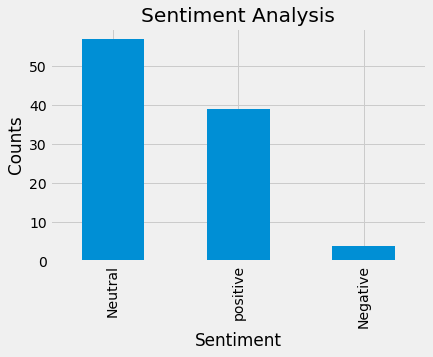

In [97]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')

# Summary
We can see the world is having a neutral opinion on Driveless cars and a quite positive sentiment for Driverless cars.
Based on our 200 tweets, its remarkable that people didn't exihit negative sentiment towards SelfDriving Cars.
Way to go AI Cars!!! 